<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [153]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Your code goes here
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test_sum_prod():
    X = [np.array([[1, 2, 1], [3, 3, 1], [4, 6, 4]]), np.array([[1, 3, 3], [4, 5, 6], [7, 8, 9]])]
    V = [np.array([[1], [3], [2]]), np.array([[5], [2], [7]])]
    first_result = np.array([[41], [86], [144]])

    our_first_result = sum_prod(X, V)
    assert np.array_equal(first_result, our_first_result), 'Ошибка в перовом тесте'

    X = [np.array([[2, 1], [1, 3]]), np.array([[1, 2], [3, 4]])]
    V = [np.array([[1], [2]]), np.array([[2], [1]])]
    second_result = np.array([[8], [17]])

    our_second_result = sum_prod(X, V)
    assert np.array_equal(second_result, our_second_result), 'Ошибка во втором тесте'

    X = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    third_result = np.array([[2], [2]])

    our_third_result = sum_prod(X, V)
    assert np.array_equal(third_result, our_third_result), 'Ошибка в третьем тесте'

test_sum_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [135]:
def binarize(M, threshold=0.5):
    # Your code goes here
    binary_matrix = []
    for row in M:
        binary_row = [1 if elem >= threshold else 0 for elem in row]
        binary_matrix.append(binary_row)
    return binary_matrix

def test_binarize():

    first_result = [[0, 1, 1, 0, 1], [1, 1, 1, 1, 1]]

    our_first_result = binarize(np.array([[0.1, 2, 3, 0.4, 5],
                                          [6, 7, 8, 0.9, 10]]))

    assert np.array_equal(first_result, our_first_result), 'Ошибка в первом тесте'

    second_result = [[1, 1, 0, 1, 1], [1, 1, 1, 1, 0]]

    our_second_result = binarize(np.array([[1.1, 2, 0.3, 40, 0.5],
                                           [6, 7, 0.8, 0.9, 0]]))

    assert np.array_equal(second_result, our_second_result), 'Ошибка во втором тесте'

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [124]:
def unique_rows(mat):
    # Your code goes here
    return [(set(row)) for row in mat.tolist()]
    pass

def unique_columns(mat):
    # Your code goes here
    transposed = mat.T
    return [(set(row)) for row in transposed.tolist()]

def test_unique_rows():

    row_result = [{1, 2, 3}, {4, 5, 6}]

    result = unique_rows(np.array([[1, 1, 2, 3, 2],
                                   [5, 4, 5, 6, 5]]))

    assert np.array_equal(row_result, result), 'Ошибка в тесте строк'

def test_unique_columns():

    col_result = [{1, 5}, {2, 4}, {3}, {2, 4}, {1, 5}]

    result = unique_columns(np.array([[1, 2, 3, 4, 5],
                                      [5, 4, 3, 2, 1]]))

    assert np.array_equal(col_result, result), 'Ошибка в тесте столбцов'

test_unique_rows()
test_unique_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

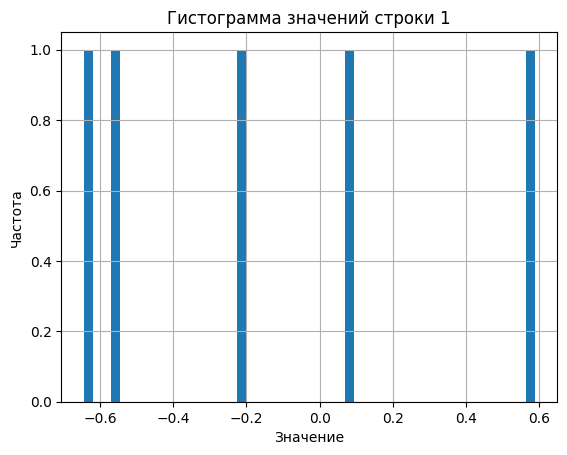

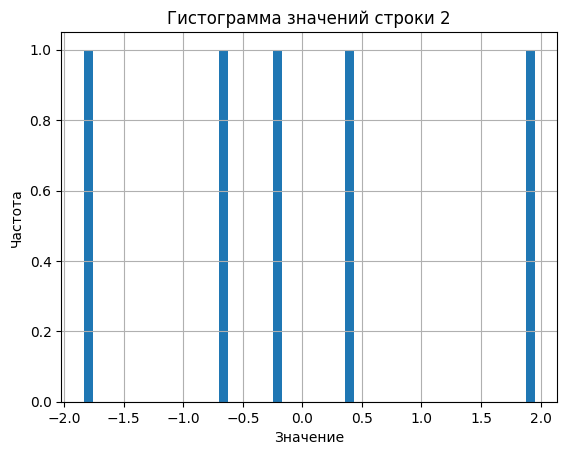

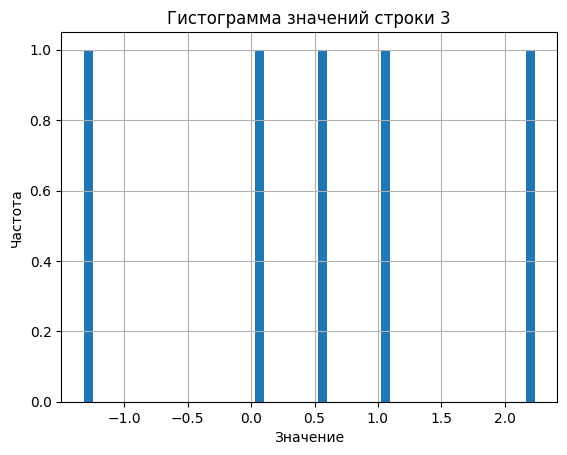

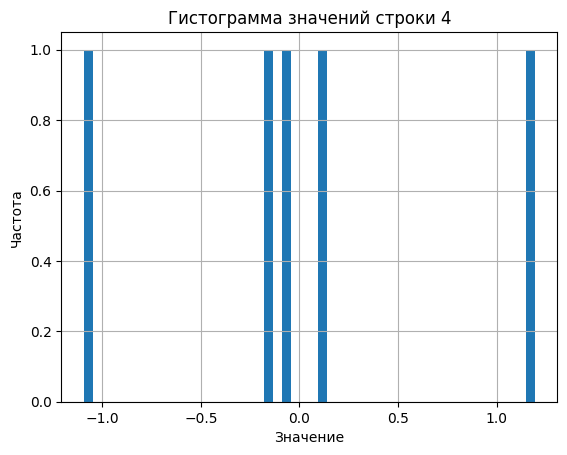

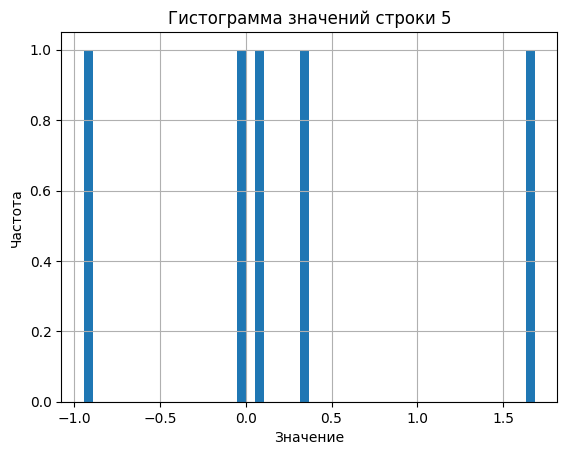

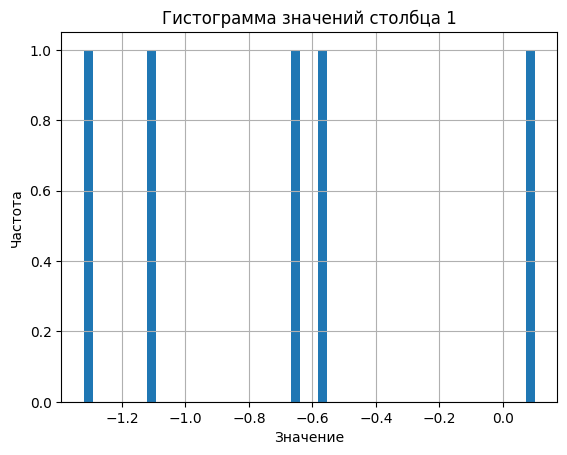

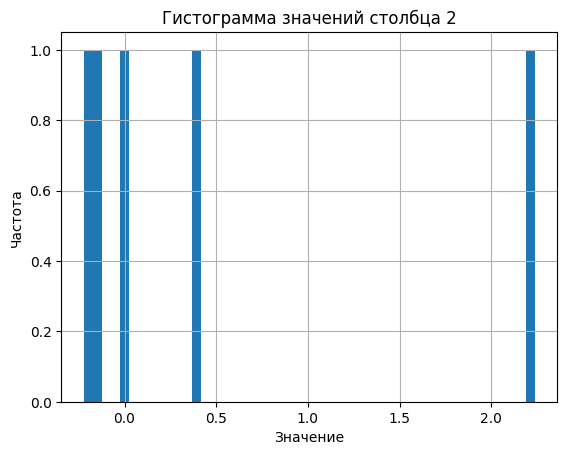

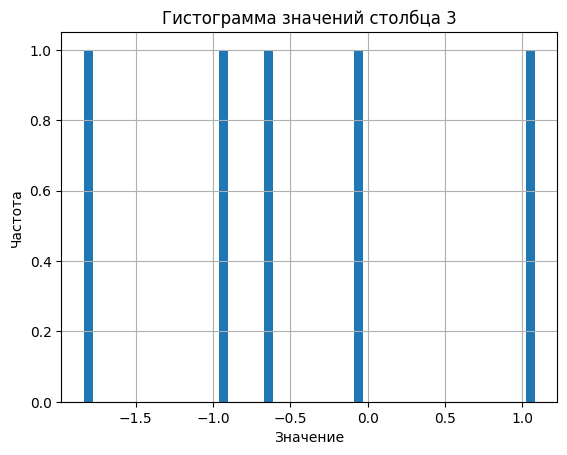

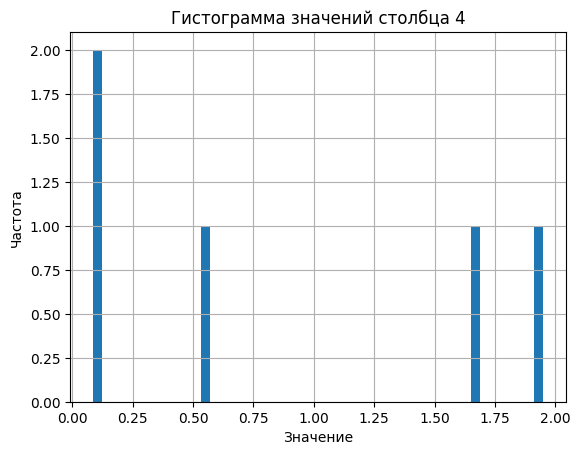

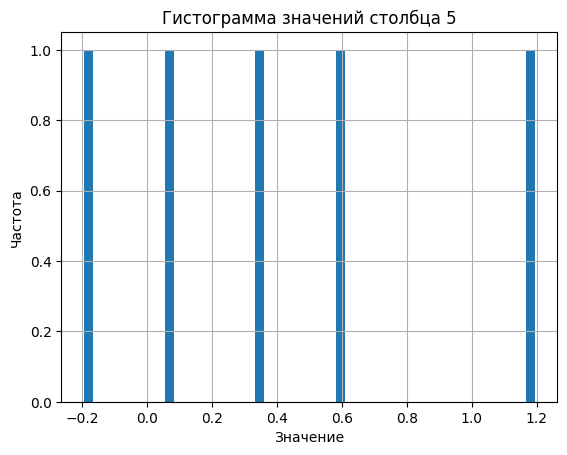

{'row_expectation': [-0.1500586824009245,
  -0.06474088289136655,
  0.5274858233040469,
  0.0017040582054647757,
  0.23558962081052776],
 'row_dispersion': [0.2028519615525294,
  1.557126738783552,
  1.3691495817062993,
  0.5307136073352028,
  0.7176215075042504],
 'col_expectation': [-0.7046575520948661,
  0.45500219842759987,
  -0.479639728346475,
  0.8763636235380254,
  0.4029113955034642],
 'col_dispersion': [0.24065091926151147,
  0.8414529732883382,
  0.9388053760457868,
  0.6277786062028012,
  0.2252568506058099]}

In [102]:
# Your code goes here
def generate_matrix_and_analyze(m, n):
    
    matrix = np.random.randn(m, n)

    row_expectation = np.mean(matrix, axis=1).tolist()
    row_dispersion = np.var(matrix, axis=1).tolist()

    col_expectation = np.mean(matrix, axis=0).tolist()
    col_dispersion = np.var(matrix, axis=0).tolist()

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=5)
        plt.title(f'Гистограмма значений строки {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=5)
        plt.title(f'Гистограмма значений столбца {j + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    return {
        "row_expectation": row_expectation,
        "row_dispersion": row_dispersion,
        "col_expectation": col_expectation,
        "col_dispersion": col_dispersion
    }

generate_matrix_and_analyze(5, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [108]:
def chess(m, n, a, b):
    # Your code goes here
    matrix = np.zeros((m, n), dtype=int)
    matrix[::2, ::2] = a
    matrix[1::2, 1::2] = a
    matrix[::2, 1::2] = b
    matrix[1::2, ::2] = b
    return matrix

def test_chess():
    first_result = np.array([[1, 3, 1, 3, 1],
                              [3, 1, 3, 1, 3],
                              [1, 3, 1, 3, 1],
                              [3, 1, 3, 1, 3]])

    assert np.array_equal(first_result, chess(4, 5, 1, 3)), 'Ошибка в первом тесте'
    
    second_result = np.array([[2, 10, 2, 10, 2],
                              [10, 2, 10, 2, 10],
                              [2, 10, 2, 10, 2],
                              [10, 2, 10, 2, 10],
                              [2, 10, 2, 10, 2]])
    
    assert np.array_equal(second_result, chess(5, 5, 2, 10)), 'Ошибка во втором тесте'
    
test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

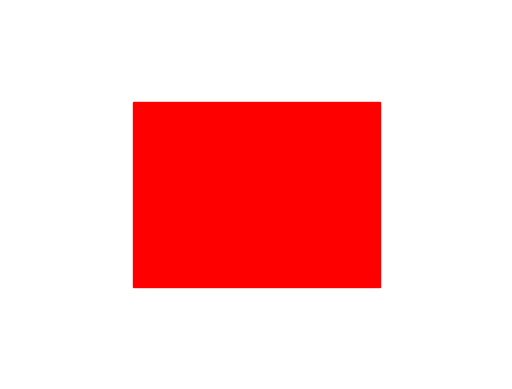

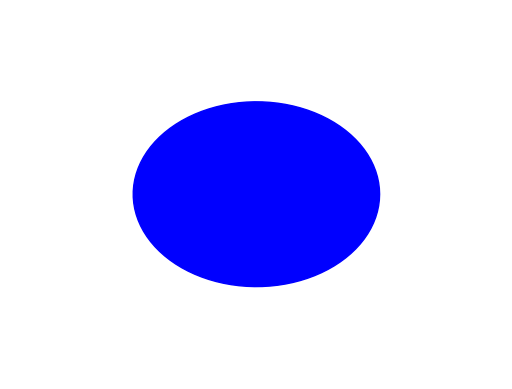

In [32]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    bottom_left_x = (m - a) / 2
    bottom_left_y = (n - b) / 2

    rect_x = [bottom_left_x, bottom_left_x + a, bottom_left_x + a, bottom_left_x, bottom_left_x]
    rect_y = [bottom_left_y, bottom_left_y, bottom_left_y + b, bottom_left_y + b, bottom_left_y]

    plt.fill(rect_x, rect_y, color=rectangle_color)

    plt.gca().invert_yaxis()
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')

    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    center_x = m / 2
    center_y = n / 2

    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = center_x + (a / 2) * np.cos(theta)
    ellipse_y = center_y + (b / 2) * np.sin(theta)

    plt.fill(ellipse_x, ellipse_y, color=ellipse_color)

    plt.gca().invert_yaxis()
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')

    plt.show()

draw_rectangle(200, 150, 400, 300, (1, 0, 0), (1, 1, 1))
draw_ellipse(200, 150, 400, 300, (0, 0, 1), (1, 1, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [105]:
def analyze_time_series(time_series, p):
    
    math_expectation = np.mean(time_series).tolist()
    dispersion = np.var(time_series).tolist()
    deviation = np.sqrt(dispersion).tolist()

    local_max = (np.diff(np.sign(np.diff(time_series))) < 0).nonzero()[0] + 1
    local_max = local_max.tolist()
    local_min = (np.diff(np.sign(np.diff(time_series))) > 0).nonzero()[0] + 1
    local_min = local_min.tolist()

    moving_average = np.convolve(time_series, np.ones(p)/p, mode='valid')
    moving_average = moving_average.tolist()

    return {
        "math_expectation": math_expectation,
        "dispersion": dispersion,
        "deviation": deviation,
        "local_max": local_max,
        "local_min": local_min,
        "moving_average": moving_average
    }

analyze_time_series([3, 5, 2, 8, 7, 4, 6, 5, 4, 9, 8, 3], 3)

{'math_expectation': 5.333333333333333,
 'dispersion': 4.722222222222222,
 'deviation': 2.173067468400883,
 'local_max': [1, 3, 6, 9],
 'local_min': [2, 5, 8],
 'moving_average': [3.333333333333333,
  5.0,
  5.666666666666666,
  6.333333333333333,
  5.666666666666666,
  5.0,
  5.0,
  6.0,
  7.0,
  6.666666666666666]}

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [104]:
# Your code goes here
def one_hot_encoding(vector):
    max_class = np.max(vector) + 1  
    matrix= np.zeros((len(vector), max_class), dtype=int)
    
    for i, vector in enumerate(vector):
        matrix[i, vector] = 1
    
    return matrix

one_hot_encoding([1, 2, 3, 4, 5])

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])